# Project: **Data Smoothing** with **CSAPS**

This notebook is a blank slate for you to write in.  Feel free to include figures (don't forget to add/commit them to your repository) and examples.  You can change the kernel (from `Python 3`; see upper right) if the open source project you're writing about does not use Python.  You can write from the prompts below or delete all the cells and start fresh.  Note that Git will always contain your history.

You can run shell commands:

In [1]:
! ls

project.ipynb  README.md


In [2]:
! pip install -U csaps


Github: https://github.com/espdev/csaps

Here we have the smoothing function of csaps on some messy univariate (single variable) data that could not be easily fitted with an exact polynomial.

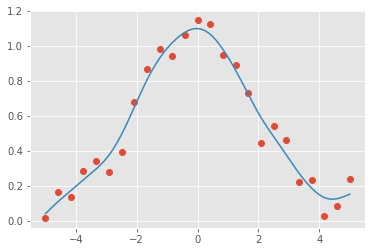

In [14]:
import numpy as np
import matplotlib.pyplot as plt

from csaps import csaps

np.random.seed(1234)

x = np.linspace(-5., 5., 25)
y = np.exp(-(x/2.5)**2) + (np.random.rand(25) - 0.2) * 0.3
xs = np.linspace(x[0], x[-1], 150)

ys = csaps(x, y, xs, smooth=0.85)

plt.plot(x, y, 'o', xs, ys, '-')
plt.show()

Next we have the smoothing function of csaps on versus the runge1 function and regression fits of the same data given in the activity on 2020-03-31.

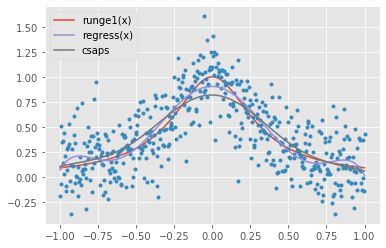

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def cosspace(a, b, n=50):
    return (a + b)/2 + (b - a)/2 * (
        np.cos(np.linspace(-np.pi, 0, n)))

def vander_chebyshev(x, n=None):
    if n is None:
        n = len(x)
    T = np.ones((len(x), n))
    if n > 1:
        T[:,1] = x
    for k in range(1,n-1):
        T[:,k+1] = 2 * x * T[:,k] - T[:,k-1]
    return T

def chebyshev_regress_eval(x, xx, n):
    V = vander_chebyshev(x, n)
    Q, R = np.linalg.qr(V)
    return vander_chebyshev(xx, n) @ np.linalg.solve(R, Q.T)

def runge1(x):
    return 1 / (1 + 10*x**2)

def runge1_noisy(x, sigma):
    return runge1(x) + np.random.randn(*x.shape)*sigma



x = np.linspace(-1, 1, 500)
ytrain = runge1_noisy(x, 0.25)
yfit = chebyshev_regress_eval(x, x, 7) @ ytrain

#csaps implementation
ys = csaps(x, yfit, x, smooth=0.85)


plt.plot(x, runge1(x), label='runge1(x)')
plt.plot(x, ytrain, '.')
plt.plot(x, yfit, label='regress(x)')
plt.plot(x, ys, label='csaps')
plt.legend(loc='upper left');



Here we have the smoothing function of csaps on some messy surface data in 3 dimensions that could not be fitted easily otherwise.

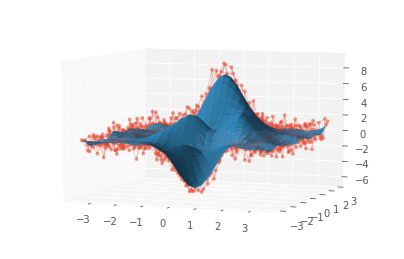

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from csaps import csaps

np.random.seed(1234)
xdata = [np.linspace(-3, 3, 41), np.linspace(-3.5, 3.5, 31)]
i, j = np.meshgrid(*xdata, indexing='ij')
ydata = (3 * (1 - j)**2. * np.exp(-(j**2) - (i + 1)**2)
         - 10 * (j / 5 - j**3 - i**5) * np.exp(-j**2 - i**2)
         - 1 / 3 * np.exp(-(j + 1)**2 - i**2))
ydata = ydata + (np.random.randn(*ydata.shape) * 0.75)

ydata_s = csaps(xdata, ydata, xdata, smooth=0.988)

fig = plt.figure(figsize=(7, 4.5))
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('none')
c = [s['color'] for s in plt.rcParams['axes.prop_cycle']]
ax.plot_wireframe(j, i, ydata, linewidths=0.5, color=c[0], alpha=0.5)
ax.scatter(j, i, ydata, s=10, c=c[0], alpha=0.5)
ax.plot_surface(j, i, ydata_s, color=c[1], linewidth=0, alpha=1.0)
ax.view_init(elev=9., azim=290)

plt.show()


## About the method

How does the method relate to concepts we've covered in class. You're writing for your fellow classmates so try to make it understandable to them. Why is the method used in this context? Can you explain why it's preferred over some alternative in this context?

Answer: 
-This method coincides with our bias and variance tradeoff when fitting deterministic data using regression and other polynomials when we did Bias-variance tradeoffs.


### Questions you have about the method

* You can list questions you haven't been able to answer. Perhaps your peers will be able to help answer them. Jed will address some questions in class.

Questions: 

-Might the csaps implementation be overfitting?

-What other assumptions might the csaps implementation be making?

-What might this csaps implementation return in terms of error, bias, and variance?

## About the software

Link to the repository. What does the software package do (at a high level)? Who develops it? Who uses it? What language is it written in and what language(s) can it be called from? If there are figures of its architecture, use, or products (e.g., from the docs), you're welcome to include them here. This is an example diagram included in the notebook:

Answer:

-Github (linked above as well): https://github.com/espdev/csaps

-This software package must implement a similar idea as regression and/or other models to implement this csaps package.

-This package was developed by espdev.

-This package was written in python3 and can be called from python versions 3.6, 3.7, and 3.8.


## Method as it appears in the software

What role does the method play in the software? How does one call it (perhaps via a higher level interface that uses the method)? Are there particular performance concerns that went into its use? How expensive is it? Can you express performance in terms that are relevant to a user? How about accuracy, conditioning, or stability in the chosen formulation?

Answer:

-This csaps implementation is the software and can be installed and imported from just like any other packages (numpy, scipy, etc.) and is treated as such in terms of performance, expensiveness, and others.

### Open questions

* Any open questions you would like to discuss or get help answering?